In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

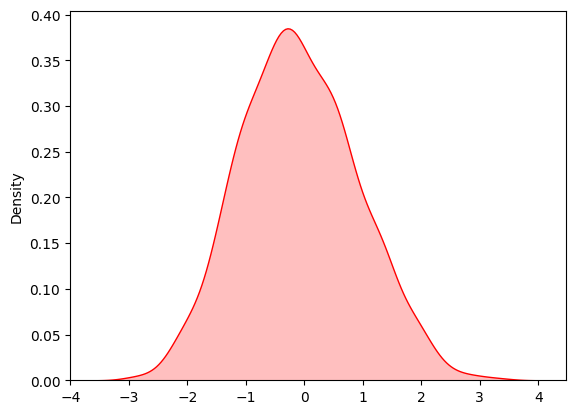

In [8]:
data = np.random.normal(size = 1000)
sns.kdeplot(data, color = 'r', fill = True)
plt.show()

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('querydata.csv')
data

,account,opportunity_id,sales_agent,deal_stage,product,created_date,close_date,close_value
0,Cancity,1C1I7A6R,Moses Frase,Won,GTX Plus Basic,10/20/2016,3/1/2017,1054
1,Isdom,Z063OYW0,Darcel Schlecht,Won,GTXPro,10/25/2016,3/11/2017,4514
2,Cancity,EC4QE1BX,Darcel Schlecht,Won,MG Special,10/25/2016,3/7/2017,50
3,Codehow,MV1LWRNH,Moses Frase,Won,GTX Basic,10/25/2016,3/9/2017,588
4,Hatfan,PE84CX4O,Zane Levy,Won,GTX Basic,10/25/2016,3/2/2017,517
...,...,...,...,...,...,...,...,...
7370,Konmatfix,VW8CEV4C,Versie Hillebrand,In Progress,MG Special,nill,nill,nill
7371,Opentech,KLUS7RVS,Versie Hillebrand,In Progress,MG Special,nill,nill,nill
7372,Rundofase,ROM4I2T0,Versie Hillebrand,In Progress,MG Special,nill,nill,nill
7373,Ganjaflex,FCNN6UY0,Versie Hillebrand,In Progress,MG Advanced,nill,nill,nill


In [5]:
data.shape

(7375, 8)

In [7]:
data.dtypes

account                   object
opportunity_id            object
sales_agent               object
deal_stage                object
product                   object
created_date      datetime64[ns]
close_date        datetime64[ns]
close_value              float64
dtype: object

In [4]:
data['created_date'] = data['created_date'].replace('nill', np.nan == True)
data['created_date'] = pd.to_datetime(data['created_date'], format = '%m/%d/%Y', errors = 'coerce')

In [5]:
data['close_date'] = data['close_date'].replace('nill', np.nan == True)
data['close_date'] = pd.to_datetime(data['close_date'], format = '%m/%d/%Y', errors = 'coerce')

In [6]:
data['close_value'] = data['close_value'].replace('nill', np.nan == True)
data['close_value'] = data['close_value'].astype('float')

In [17]:
data.head(3)

,account,opportunity_id,sales_agent,deal_stage,product,created_date,close_date,close_value,month,weekday
0,Cancity,1C1I7A6R,Moses Frase,Won,GTX Plus Basic,2016-10-20,2017-03-01,1054.0,October,Thursday
1,Isdom,Z063OYW0,Darcel Schlecht,Won,GTXPro,2016-10-25,2017-03-11,4514.0,October,Tuesday
2,Cancity,EC4QE1BX,Darcel Schlecht,Won,MG Special,2016-10-25,2017-03-07,50.0,October,Tuesday


In [8]:
data['month'] = data['created_date'].dt.strftime('%B')
data['weekday'] = data['created_date'].dt.strftime('%A')

In [14]:
month_sales = data.groupby('month')['close_value'].sum().reset_index(name = 'total')
month_sales

,month,total
0,April,1035338.0
1,August,706513.0
2,December,474505.0
3,February,757978.0
4,January,408451.0
5,July,1049172.0
6,June,1080280.0
7,March,1004017.0
8,May,852638.0
9,November,584617.0


In [15]:
arranged = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_sales['month'] = pd.Categorical(month_sales['month'], categories = arranged, ordered = True)
month_sales = month_sales.sort_values(by = 'month')
month_sales

,month,total
4,January,408451.0
3,February,757978.0
7,March,1004017.0
0,April,1035338.0
8,May,852638.0
6,June,1080280.0
5,July,1049172.0
1,August,706513.0
11,September,1037048.0
10,October,1014977.0


In [20]:
weekday_sales = data.groupby('weekday')['close_value'].sum().reset_index(name = 'value')
weekday_sales

,weekday,value
0,Friday,1374065.0
1,Monday,1486328.0
2,Saturday,1336529.0
3,Sunday,1648141.0
4,Thursday,1476542.0
5,Tuesday,1336032.0
6,Wednesday,1347897.0


In [24]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales['weekday'] = pd.Categorical(weekday_sales['weekday'], categories = order, ordered = True)
weekday_sales = weekday_sales.sort_values(by = 'weekday')
weekday_sales

,weekday,value
1,Monday,1486328.0
5,Tuesday,1336032.0
6,Wednesday,1347897.0
4,Thursday,1476542.0
0,Friday,1374065.0
2,Saturday,1336529.0
3,Sunday,1648141.0


In [31]:
from matplotlib import pyplot as plt
import plotly.express as px

fig = px.bar(weekday_sales, weekday_sales['weekday'], weekday_sales['value'], title = 'Sales By Weekdays')
fig.show()

In [69]:
stock = px.data.stocks()
stock

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708
...,...,...,...,...,...,...,...
100,2019-12-02,1.216280,1.546914,1.425061,1.075997,1.463641,1.720717
101,2019-12-09,1.222821,1.572286,1.432660,1.038855,1.421496,1.752239
102,2019-12-16,1.224418,1.596800,1.453455,1.104094,1.604362,1.784896
103,2019-12-23,1.226504,1.656000,1.521226,1.113728,1.567170,1.802472


In [51]:
fig = px.line(month_sales, month_sales['month'], month_sales['total'], 
    labels = {'month': 'month', 'values': 'total'}, markers = True, title = 'Month On Month Sales')
    
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Total Sales',
    title_x=0.5,  # Center the title
    template='plotly_white',  # Use a clean, white background theme
    hovermode='x unified'  # Display a unified tooltip across the x-axis
)

fig.show()

In [55]:
stock.describe().reset_index()

,index,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
1,mean,1.046206,1.138536,1.393822,0.945121,1.540559,1.318059
2,std,0.077776,0.182109,0.140796,0.103350,0.200508,0.220662
3,min,0.888689,0.847200,1.000000,0.668718,1.000000,0.988547
4,25%,0.992924,1.000400,1.304091,0.879529,1.398876,1.142873
5,50%,1.036372,1.095429,1.420278,0.959968,1.560884,1.242431
6,75%,1.095189,1.236000,1.491702,1.016858,1.701605,1.543599
7,max,1.226504,1.678000,1.637494,1.123575,1.957665,1.802472


In [56]:
stock.columns

Index(['date', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'], dtype='object')

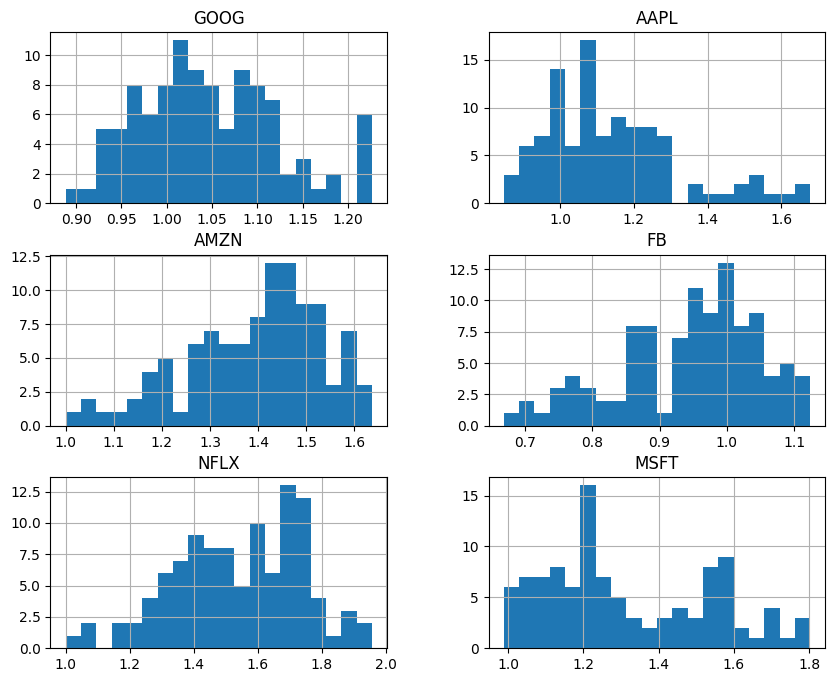

In [60]:
stock.hist(bins = 20, figsize = (10,8))
plt.show()

In [72]:
stock['date'] = pd.to_datetime(stock['date'])

In [104]:
stock.dtypes

date     datetime64[ns]
GOOG            float64
AAPL            float64
AMZN            float64
FB              float64
NFLX            float64
MSFT            float64
year             object
month            object
day              object
dtype: object

In [107]:
stock.head(3)

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT,year,month,day
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2018,January,Monday
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988,2018,January,Monday
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524,2018,January,Monday


In [106]:
stock['year'] = pd.to_datetime(stock['date']).dt.year

In [78]:
stock['month'] = stock['date'].dt.strftime('%B')
stock['day'] = stock['date'].dt.strftime('%A')

In [109]:
values = stock.pivot_table(values =  ['GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'], index = 'year', aggfunc = 'sum').reset_index()
values

,year,AAPL,AMZN,FB,GOOG,MSFT,NFLX
0,2018,56.844571,70.545112,48.295744,53.422862,60.739198,80.157053
1,2019,62.701714,75.806205,50.941984,56.428759,77.656989,81.601646


In [4]:
df

,Category,Ratings,Average,Standard Deviation
0,Teaching Effectiveness,"[4, 3, 5, 4, 5, 4]",4.17,0.69
1,Management Support,"[4, 3, 4, 5, 4, 4]",4.00,0.58
2,Resource Availability,"[3, 2, 4, 4, 5, 3]",3.50,0.96
3,Professional Development,"[5, 4, 5, 4, 3, 5]",4.33,0.75
4,Communication,"[3, 3, 3, 2, 4, 3]",3.00,0.58
5,Parent Satisfaction,"[4, 5, 4, 3, 2, 4]",3.67,0.94
6,Team Collaboration,"[5, 4, 4, 4, 3, 5]",4.17,0.69
7,Curriculum Review,"[4, 4, 3, 4, 4, 5]",4.00,0.58
8,Work Environment,"[5, 4, 5, 5, 4, 5]",4.67,0.47
9,Overall Satisfaction,"[4, 3, 5, 5, 5, 4]",4.33,0.75


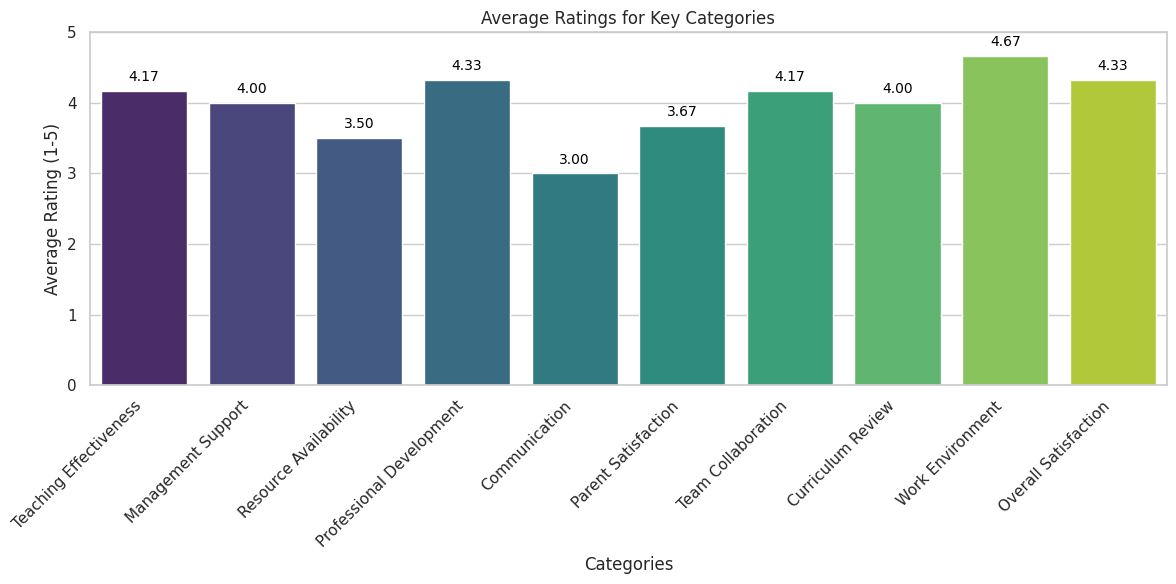

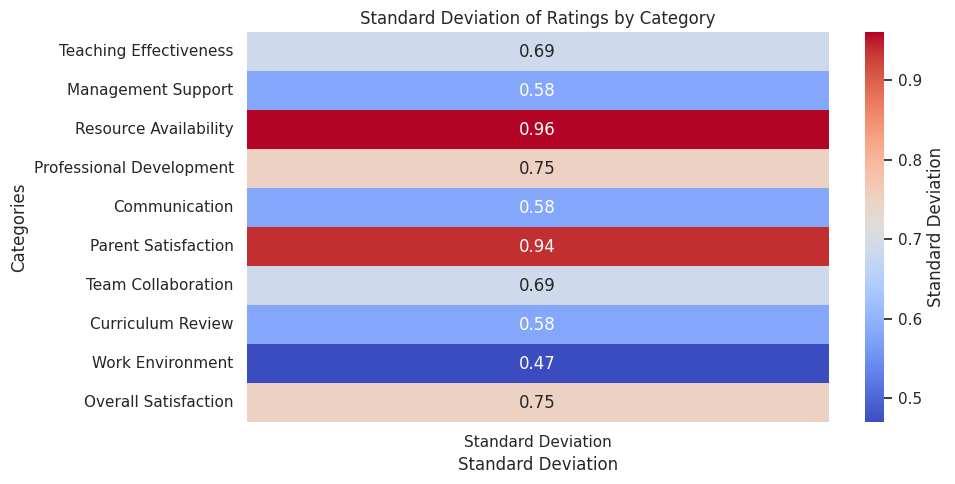

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Category': [
        'Teaching Effectiveness', 'Management Support', 'Resource Availability',
        'Professional Development', 'Communication', 'Parent Satisfaction',
        'Team Collaboration', 'Curriculum Review', 'Work Environment', 'Overall Satisfaction'
    ],
    'Ratings': [
        [4, 3, 5, 4, 5, 4],  # Teaching Effectiveness
        [4, 3, 4, 5, 4, 4],  # Management Support
        [3, 2, 4, 4, 5, 3],  # Resource Availability
        [5, 4, 5, 4, 3, 5],  # Professional Development
        [3, 3, 3, 2, 4, 3],  # Communication
        [4, 5, 4, 3, 2, 4],  # Parent Satisfaction
        [5, 4, 4, 4, 3, 5],  # Team Collaboration
        [4, 4, 3, 4, 4, 5],  # Curriculum Review
        [5, 4, 5, 5, 4, 5],  # Work Environment
        [4, 3, 5, 5, 5, 4],  # Overall Satisfaction
    ]
}

# Convert data to DataFrame and calculate averages and standard deviations
df = pd.DataFrame(data)
df['Average'] = df['Ratings'].apply(np.mean).round(2)
df['Standard Deviation'] = df['Ratings'].apply(np.std).round(2)

# Prepare for plotting
categories = df['Category']
averages = df['Average']
std_devs = df['Standard Deviation']

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot bar graph for average ratings
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=categories, y=averages, palette='viridis', hue = categories)
plt.title('Average Ratings for Key Categories')
plt.xlabel('Categories')
plt.ylabel('Average Rating (1-5)')
plt.xticks(rotation=45 , ha = 'right')
plt.ylim(0, 5)
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', color='black', fontsize=10, 
                      xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

# Plot heatmap for standard deviations
heatmap_data = df[['Category', 'Standard Deviation']].set_index('Category')
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar_kws={'label': 'Standard Deviation'}, fmt=".2f")
plt.title('Standard Deviation of Ratings by Category')
plt.ylabel('Categories')
plt.xlabel('Standard Deviation')
plt.tight_layout()
plt.show()


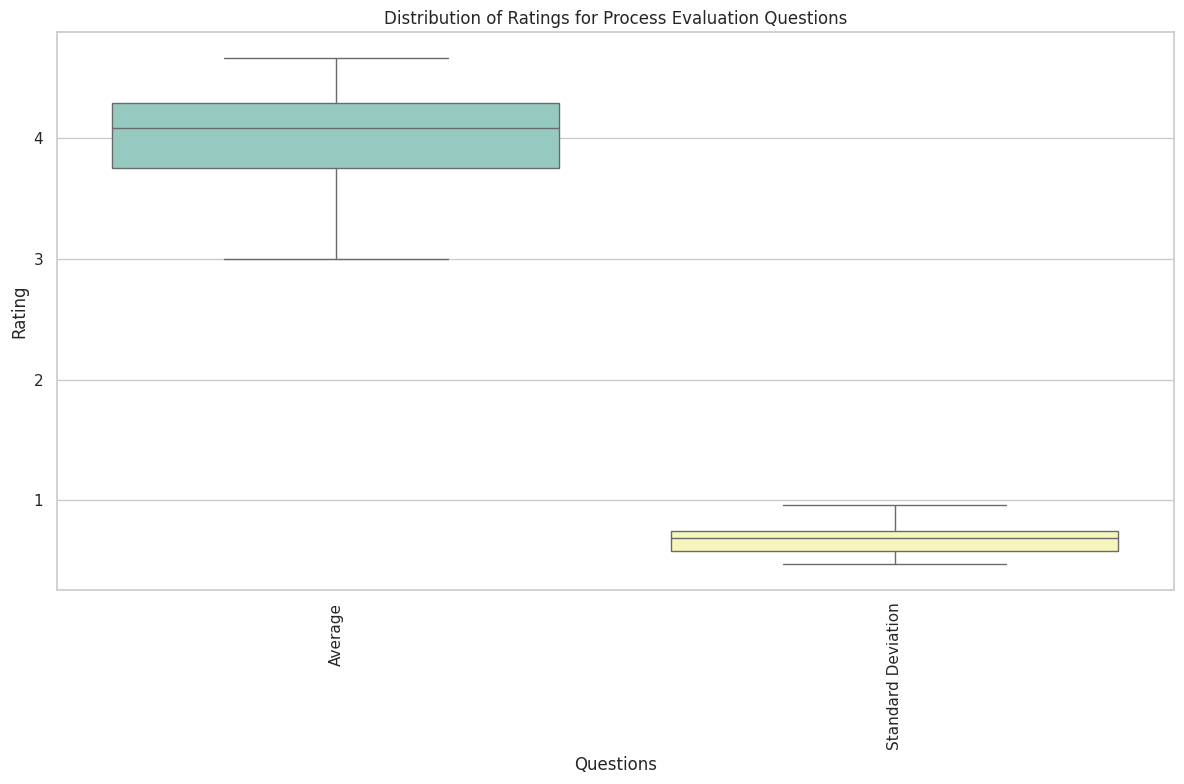

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(data= df,palette='Set3')
plt.xticks(rotation=90)
plt.xlabel("Questions")
plt.ylabel("Rating")
plt.title("Distribution of Ratings for Process Evaluation Questions")
plt.tight_layout()
plt.show()

In [2]:
!pip install wordcloud==1.9.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.6/513.6 kB 4.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


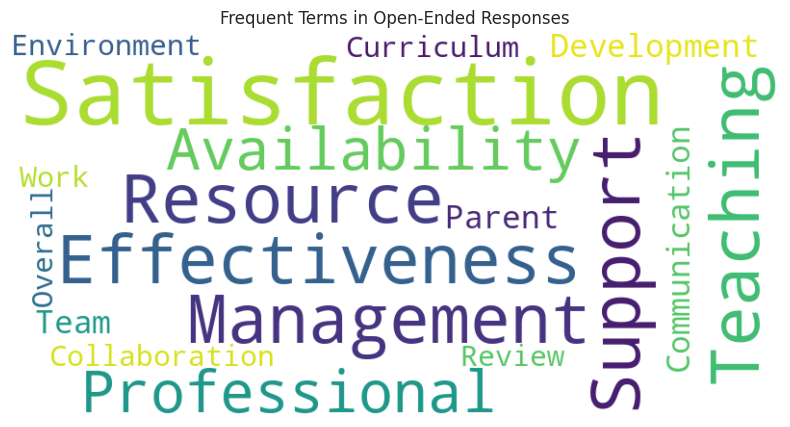

In [6]:
from wordcloud import WordCloud

# Assuming open-ended responses are in a column named 'OpenResponses'
text = ' '.join(categories.dropna())

# Generate and display word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Frequent Terms in Open-Ended Responses")
plt.show()

In [3]:
df

,Category,Ratings,Average,Standard Deviation
0,Teaching Effectiveness,"[4, 3, 5, 4, 5, 4]",4.17,0.69
1,Management Support,"[4, 3, 4, 5, 4, 4]",4.00,0.58
2,Resource Availability,"[3, 2, 4, 4, 5, 3]",3.50,0.96
3,Professional Development,"[5, 4, 5, 4, 3, 5]",4.33,0.75
4,Communication,"[3, 3, 3, 2, 4, 3]",3.00,0.58
5,Parent Satisfaction,"[4, 5, 4, 3, 2, 4]",3.67,0.94
6,Team Collaboration,"[5, 4, 4, 4, 3, 5]",4.17,0.69
7,Curriculum Review,"[4, 4, 3, 4, 4, 5]",4.00,0.58
8,Work Environment,"[5, 4, 5, 5, 4, 5]",4.67,0.47
9,Overall Satisfaction,"[4, 3, 5, 5, 5, 4]",4.33,0.75


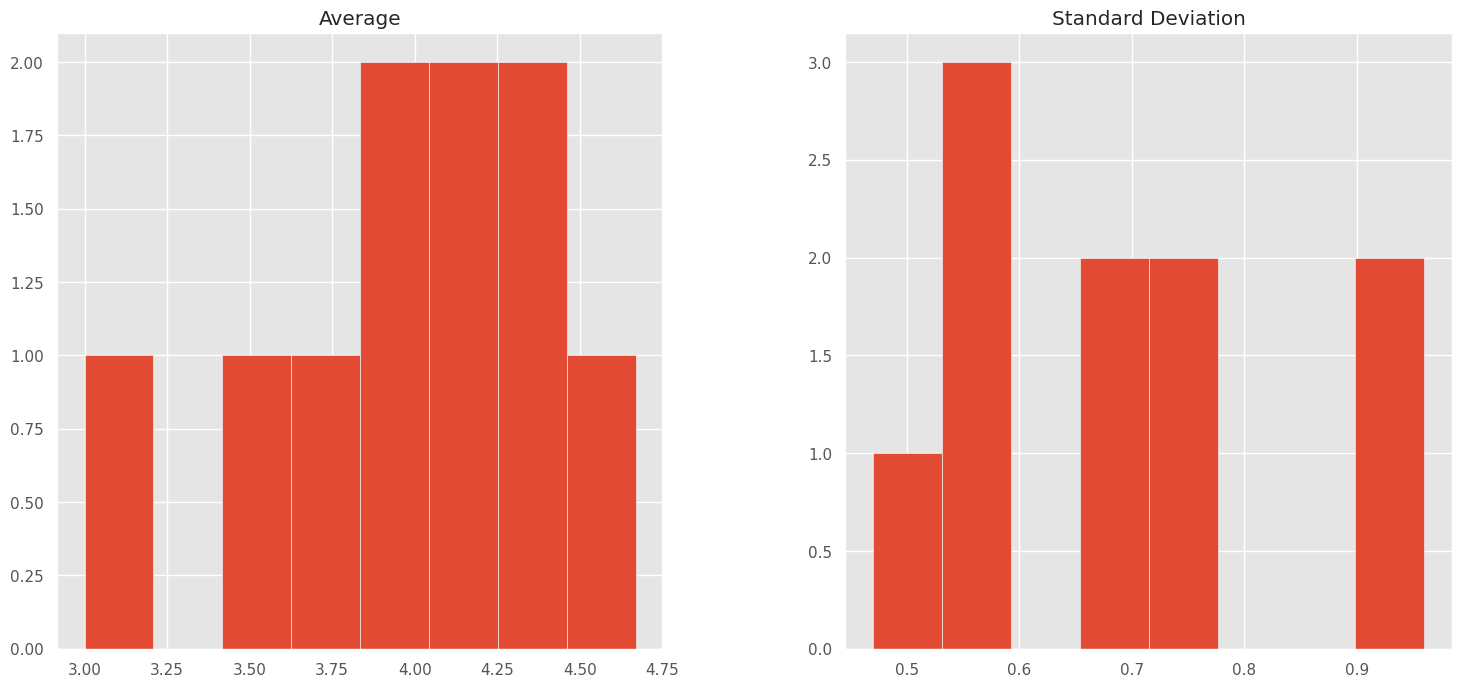

In [6]:
from matplotlib import style
style.use('ggplot')

hist_data = df[['Average', 'Standard Deviation']]
hist_data.hist(bins = 8, figsize = (18,8))
plt.show()

In [11]:
!pip install networkx


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


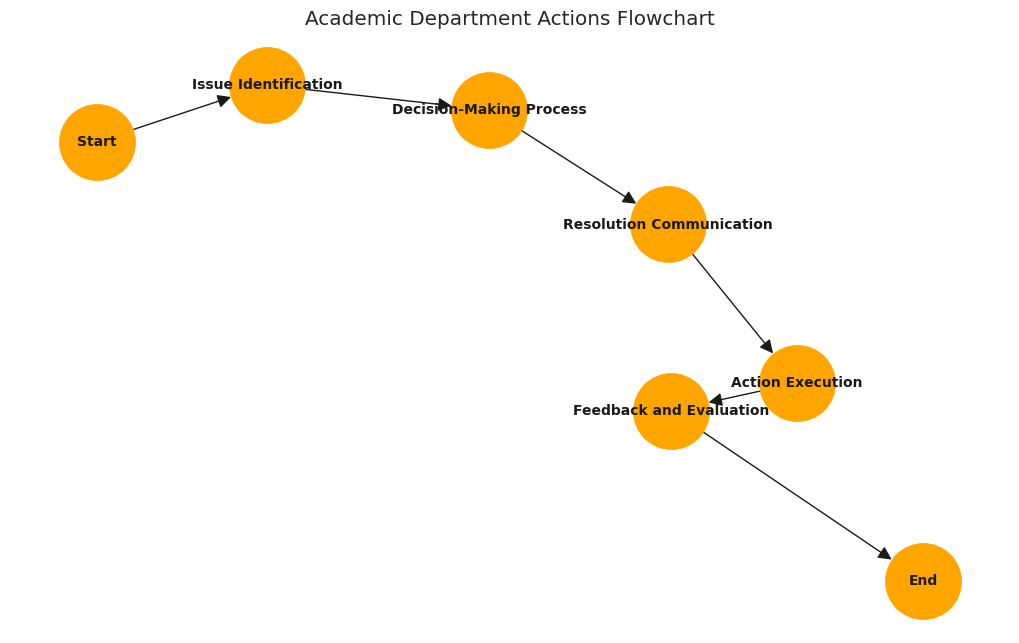

In [16]:
import matplotlib.pyplot as plt
import networkx as nx

# Create flowchart for Academic Actions
admin_flowchart = nx.DiGraph()

# Add nodes and edges for academic actions flowchart
admin_flowchart.add_node("Start")
admin_flowchart.add_node("Issue Identification")
admin_flowchart.add_node("Decision-Making Process")
admin_flowchart.add_node("Resolution Communication")
admin_flowchart.add_node("Action Execution")
admin_flowchart.add_node("Feedback and Evaluation")
admin_flowchart.add_node("End")

admin_flowchart.add_edges_from([
    ("Start", "Issue Identification"),
    ("Issue Identification", "Decision-Making Process"),
    ("Decision-Making Process", "Resolution Communication"),
    ("Resolution Communication", "Action Execution"),
    ("Action Execution", "Feedback and Evaluation"),
    ("Feedback and Evaluation", "End")
])

# Plotting administrative actions flowchart
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(admin_flowchart, seed=42)
nx.draw(admin_flowchart, pos, with_labels=True, node_size=3000, node_color='orange', font_size=10, font_weight='bold', arrowsize=20)
plt.title("Academic Department Actions Flowchart")
plt.show()

# Create flowchart for Security Measures
# security_flowchart = nx.DiGraph()

# Add nodes and edges for security flowchart
# security_flowchart.add_node("Start")
# security_flowchart.add_node("Intruder Detection")
# security_flowchart.add_node("Immediate Response")
# security_flowchart.add_node("Visitor Management")
# security_flowchart.add_node("Incident Escalation")
# security_flowchart.add_node("Post-Incident Review")
# security_flowchart.add_node("End")

# security_flowchart.add_edges_from([
#     ("Start", "Intruder Detection"),
#     ("Intruder Detection", "Immediate Response"),
#     ("Immediate Response", "Visitor Management"),
#     ("Visitor Management", "Incident Escalation"),
#     ("Incident Escalation", "Post-Incident Review"),
#     ("Post-Incident Review", "End")
# ])

# Plotting security measures flowchart
# plt.figure(figsize=(10, 6))
# pos = nx.spring_layout(security_flowchart, seed=42)
# nx.draw(security_flowchart, pos, with_labels=True, node_size=3000, node_color='lightgreen', font_size=10, font_weight='bold', arrowsize=20)
# plt.title("Security Measures Flowchart")
# plt.show()

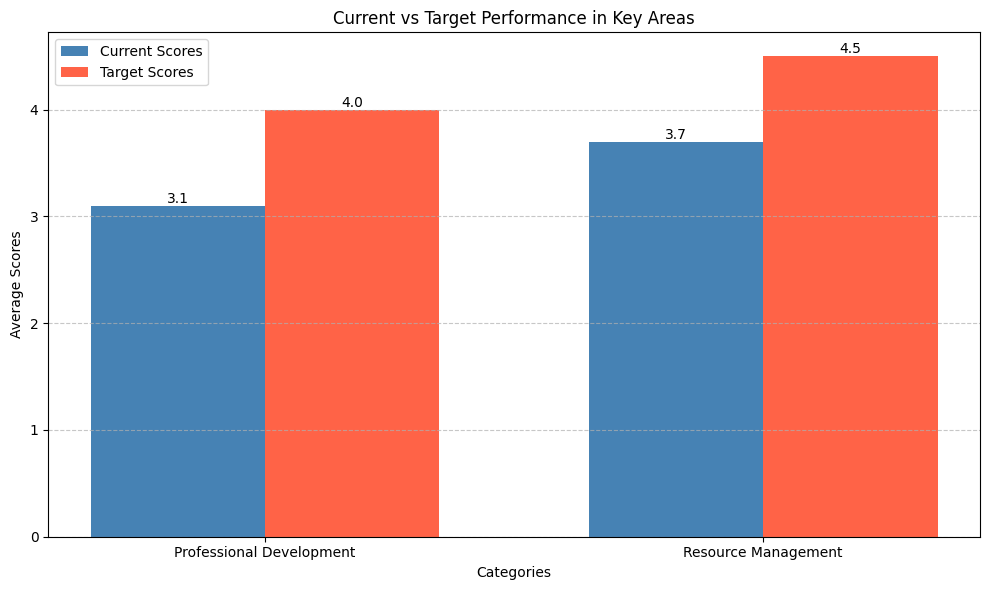

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for current and target benchmarks in professional development and resource management.
# These values are assumed based on typical targets and the initial analysis overview.

categories = [
        "Guidance by School Values", "Knowledge of Policies", "Decision-Making Effectiveness",
        "Qualified Candidate Recruitment", "Professional Development", "Promotion Management",
        "Comprehensive Reporting", "Waste Management", "Storage & Inventory Management",
        "Orderliness and Cleanliness", "Resource Management",
        "Preparedness and Training", "Visitor Management"
    ]
current_scores = [[
        4.1, 4.0, 3.0, 4.17, 3.2, 3.0, 3.17, 3.0, 4.0, 3.83, 3.7, 3.0, 3.1
    ]  # Average ratings from initial data
target_scores = [4.0, 4.5]   # Hypothetical target benchmarks

# Plotting the comparison chart for performance gaps
x = np.arange(len(categories))
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, current_scores, width, label='Current Scores', color='steelblue')
bars2 = ax.bar(x + width/2, target_scores, width, label='Target Scores', color='tomato')

# Add labels, title, and legend
ax.set_xlabel('Categories')
ax.set_ylabel('Average Scores')
ax.set_title('Current vs Target Performance in Key Areas')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add values above bars for clarity
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [7]:
!pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


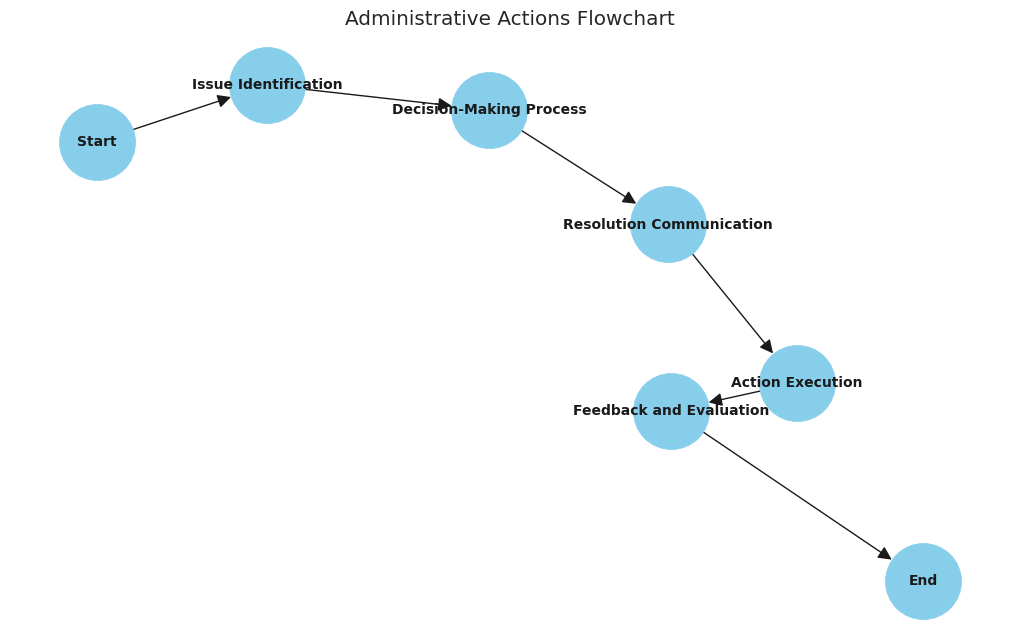

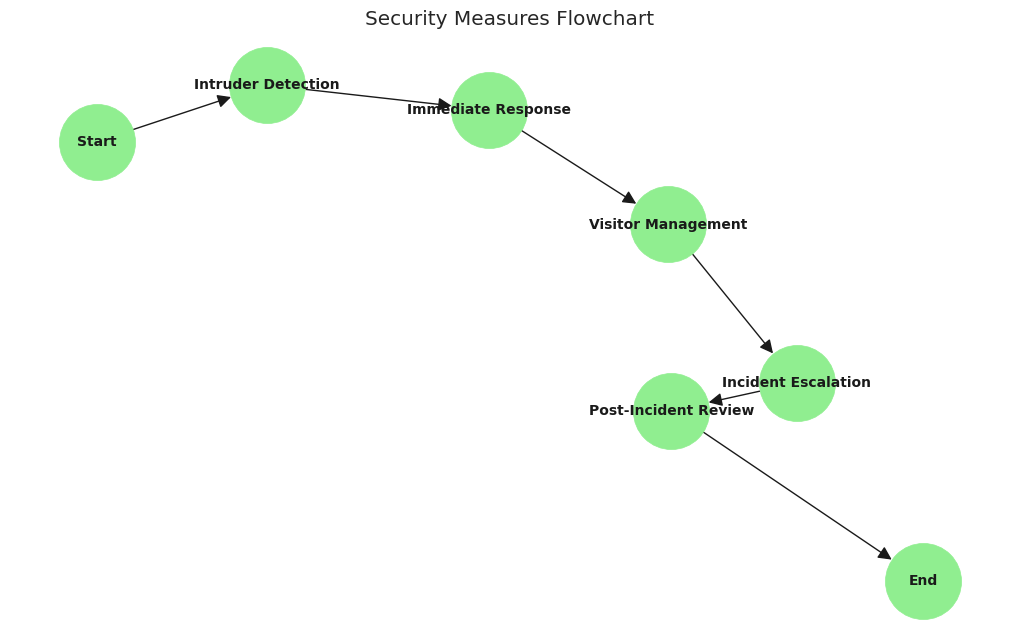

In [17]:
import matplotlib.pyplot as plt
import networkx as nx

# Create flowchart for Administrative Actions
admin_flowchart = nx.DiGraph()

# Add nodes and edges for administrative actions flowchart
admin_flowchart.add_node("Start")
admin_flowchart.add_node("Issue Identification")
admin_flowchart.add_node("Decision-Making Process")
admin_flowchart.add_node("Resolution Communication")
admin_flowchart.add_node("Action Execution")
admin_flowchart.add_node("Feedback and Evaluation")
admin_flowchart.add_node("End")

admin_flowchart.add_edges_from([
    ("Start", "Issue Identification"),
    ("Issue Identification", "Decision-Making Process"),
    ("Decision-Making Process", "Resolution Communication"),
    ("Resolution Communication", "Action Execution"),
    ("Action Execution", "Feedback and Evaluation"),
    ("Feedback and Evaluation", "End")
])

# Plotting administrative actions flowchart
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(admin_flowchart, seed=42)
nx.draw(admin_flowchart, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)
plt.title("Administrative Actions Flowchart")
plt.show()

# Create flowchart for Security Measures
security_flowchart = nx.DiGraph()

# Add nodes and edges for security flowchart
security_flowchart.add_node("Start")
security_flowchart.add_node("Intruder Detection")
security_flowchart.add_node("Immediate Response")
security_flowchart.add_node("Visitor Management")
security_flowchart.add_node("Incident Escalation")
security_flowchart.add_node("Post-Incident Review")
security_flowchart.add_node("End")

security_flowchart.add_edges_from([
    ("Start", "Intruder Detection"),
    ("Intruder Detection", "Immediate Response"),
    ("Immediate Response", "Visitor Management"),
    ("Visitor Management", "Incident Escalation"),
    ("Incident Escalation", "Post-Incident Review"),
    ("Post-Incident Review", "End")
])

# Plotting security measures flowchart
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(security_flowchart, seed=42)
nx.draw(security_flowchart, pos, with_labels=True, node_size=3000, node_color='lightgreen', font_size=10, font_weight='bold', arrowsize=20)
plt.title("Security Measures Flowchart")
plt.show()

In [13]:
df

,Categories,Average Scores
0,Guidance by School Values,4.10
1,Knowledge of Policies,4.00
2,Decision-Making Effectiveness,3.00
3,Qualified Candidate Recruitment,4.17
4,Professional Development,3.20
5,Promotion Management,3.00
6,Comprehensive Reporting,3.17
7,Waste Management,3.00
8,Storage & Inventory Management,4.00
9,Orderliness and Cleanliness,3.83


/tmp/ipykernel_84/809270589.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Scores', y='Categories', data=df, palette='viridis')


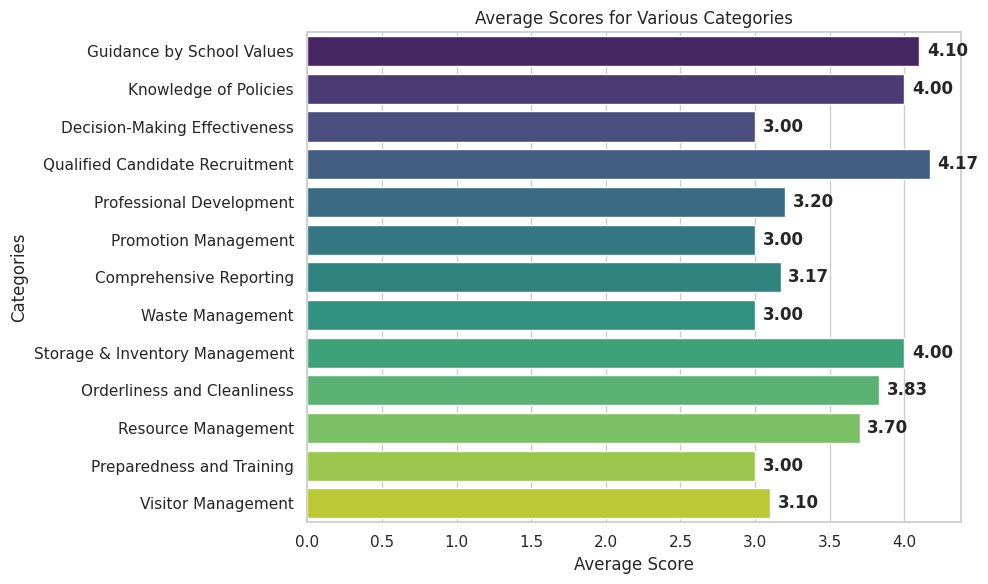

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data for categories and their corresponding average ratings
data = {
    'Categories': [
        "Guidance by School Values", "Knowledge of Policies", "Decision-Making Effectiveness",
        "Qualified Candidate Recruitment", "Professional Development", "Promotion Management",
        "Comprehensive Reporting", "Waste Management", "Storage & Inventory Management",
        "Orderliness and Cleanliness", "Resource Management",
        "Preparedness and Training", "Visitor Management"
    ],
    'Average Scores': [
        4.1, 4.0, 3.0, 4.17, 3.2, 3.0, 3.17, 3.0, 4.0, 3.83, 3.7, 3.0, 3.1
    ]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Set the plot size
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot using Seaborn
sns.set(style = 'whitegrid')
sns.barplot(x='Average Scores', y='Categories', data=df, palette='viridis')

# Add data labels to each bar
for index, value in enumerate(df['Average Scores']):
    plt.text(value + 0.05, index, f'{value:.2f}', va='center', fontweight='bold')

# Set the title and labels
plt.title('Average Scores for Various Categories')
plt.xlabel('Average Score')
plt.ylabel('Categories')

# Display the plot
plt.tight_layout()
plt.show()

In [20]:
df

,Categories,Average Scores
0,Guidance by School Values,4.10
1,Knowledge of Policies,4.00
2,Decision-Making Effectiveness,3.00
3,Qualified Candidate Recruitment,4.17
4,Professional Development,3.20
5,Promotion Management,3.00
6,Comprehensive Reporting,3.17
7,Waste Management,3.00
8,Storage & Inventory Management,4.00
9,Orderliness and Cleanliness,3.83


In [4]:
import pandas as pd
import numpy as np
survey_data = {
    'Categories': [
        'Guidance by School Values', 'Knowledge of Policies', 'Decision-Making Effectiveness', 
        'Qualified Candidate Recruitment', 'Professional Development', 'Promotion Management', 
        'Comprehensive Reporting', 'Waste Management', 'Storage & Inventory Management', 
        'Orderliness and Cleanliness', 'Resource Management', 'Preparedness and Training', 'Visitor Management'
    ],
    'Ratings': [
        [4.1,4.0, 4.2], [4.0, 4.1, 3.9], [3.0, 3.2, 2.9], [4.3, 4.2, 4.0], [3.2, 3.1, 3.0], [3.0, 3.1, 3.0],
        [3.2, 3.1, 3.0], [3.0, 3.1, 3.2], [4.1, 4.0, 4.2], [3.8, 3.9, 3.7], [3.7, 3.6,3.8], [3.0, 3.1, 2.9],
        [3.2, 3.0, 3.1]
    ]
}

survey = pd.DataFrame(survey_data)
survey['Average'] = survey['Ratings'].apply(np.mean).round(2)
survey['Standard Deviation'] = survey['Ratings'].apply(np.std).round(2)
survey

,Categories,Ratings,Average,Standard Deviation
0,Guidance by School Values,"[4.1, 4.0, 4.2]",4.10,0.08
1,Knowledge of Policies,"[4.0, 4.1, 3.9]",4.00,0.08
2,Decision-Making Effectiveness,"[3.0, 3.2, 2.9]",3.03,0.12
3,Qualified Candidate Recruitment,"[4.3, 4.2, 4.0]",4.17,0.12
4,Professional Development,"[3.2, 3.1, 3.0]",3.10,0.08
5,Promotion Management,"[3.0, 3.1, 3.0]",3.03,0.05
6,Comprehensive Reporting,"[3.2, 3.1, 3.0]",3.10,0.08
7,Waste Management,"[3.0, 3.1, 3.2]",3.10,0.08
8,Storage & Inventory Management,"[4.1, 4.0, 4.2]",4.10,0.08
9,Orderliness and Cleanliness,"[3.8, 3.9, 3.7]",3.80,0.08


In [5]:
analysis_data = survey[['Categories', 'Average', 'Standard Deviation']]
analysis_data

,Categories,Average,Standard Deviation
0,Guidance by School Values,4.10,0.08
1,Knowledge of Policies,4.00,0.08
2,Decision-Making Effectiveness,3.03,0.12
3,Qualified Candidate Recruitment,4.17,0.12
4,Professional Development,3.10,0.08
5,Promotion Management,3.03,0.05
6,Comprehensive Reporting,3.10,0.08
7,Waste Management,3.10,0.08
8,Storage & Inventory Management,4.10,0.08
9,Orderliness and Cleanliness,3.80,0.08


In [4]:
numeric_data = analysis_data[['Average', 'Standard Deviation']]
numeric_data

,Average,Standard Deviation
0,4.10,0.08
1,4.00,0.08
2,3.03,0.12
3,4.17,0.12
4,3.10,0.08
5,3.03,0.05
6,3.10,0.08
7,3.10,0.08
8,4.10,0.08
9,3.80,0.08


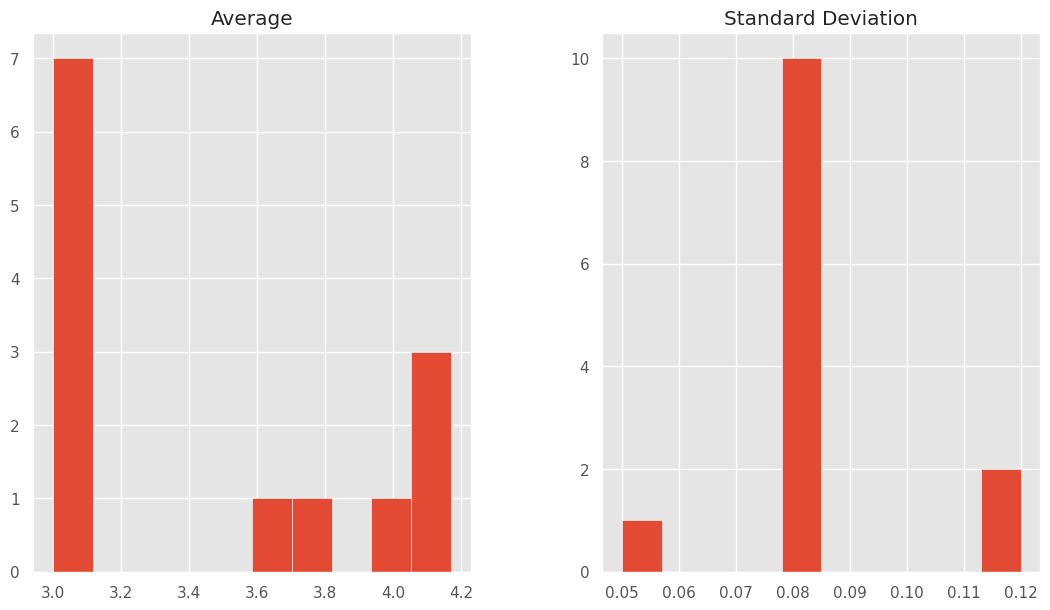

In [45]:
from matplotlib import pyplot as plt
from matplotlib import style
style.use('ggplot')
numeric_data.hist(bins = 10, figsize = (13,7))
plt.show()

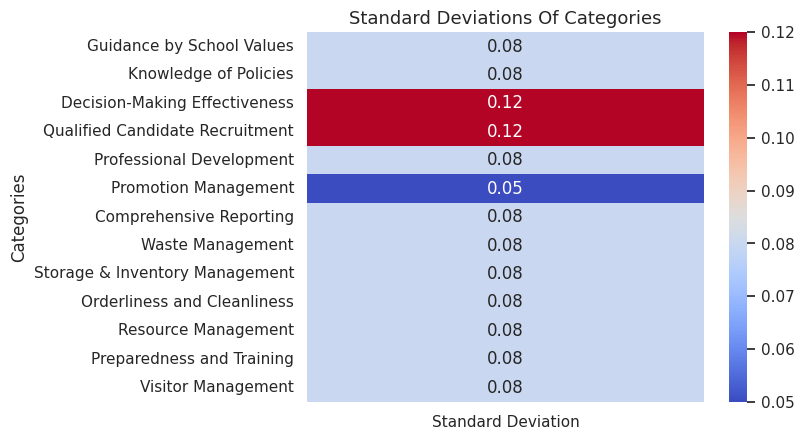

In [36]:
import seaborn as sbn
sbn.set(style = 'darkgrid', palette = 'rocket')

heatmap_data = analysis_data[['Categories', 'Standard Deviation']].set_index('Categories')
sbn.heatmap(data = heatmap_data, annot = True, cmap = 'coolwarm')
plt.title('Standard Deviations Of Categories', fontsize = 13)
plt.show()

/tmp/ipykernel_84/2442972043.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sbn.kdeplot(data = analysis_data, x = 'Average', fill = True, palette = 'viridis', hue = 'Standard Deviation')


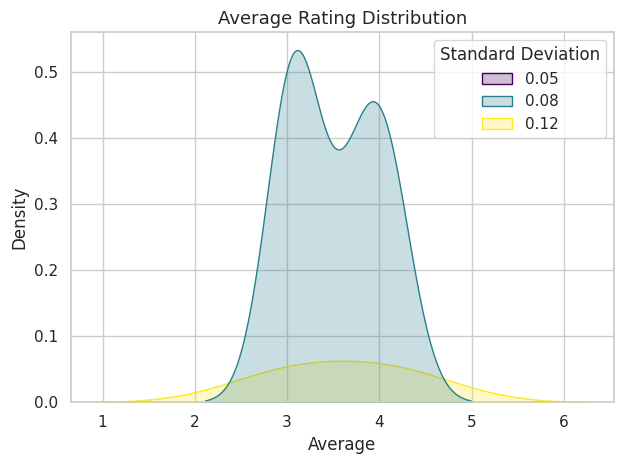

In [33]:
sbn.set(style = 'whitegrid')
sbn.kdeplot(data = analysis_data, x = 'Average', fill = True, palette = 'viridis', hue = 'Standard Deviation')
plt.title('Average Rating Distribution', fontsize = 13)
plt.tight_layout()
plt.show()

In [2]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.6/513.6 kB 41.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


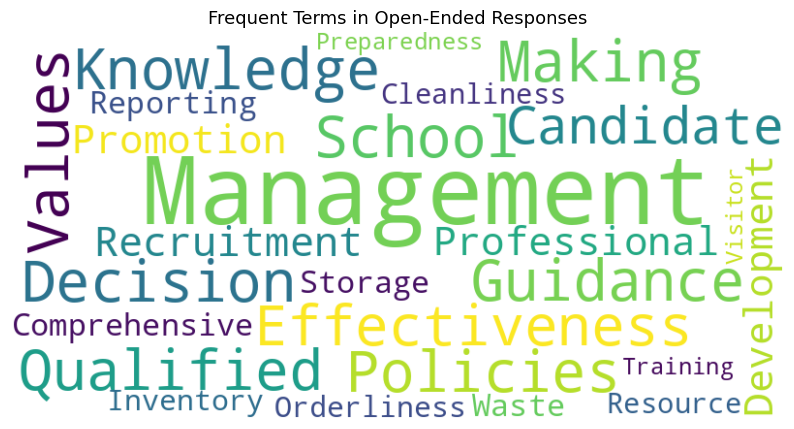

In [7]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

text = ' '.join(analysis_data['Categories'].dropna())

# Generate and display word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Frequent Terms in Open-Ended Responses", fontsize = 13)
plt.show()

In [19]:
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 10.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 100.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


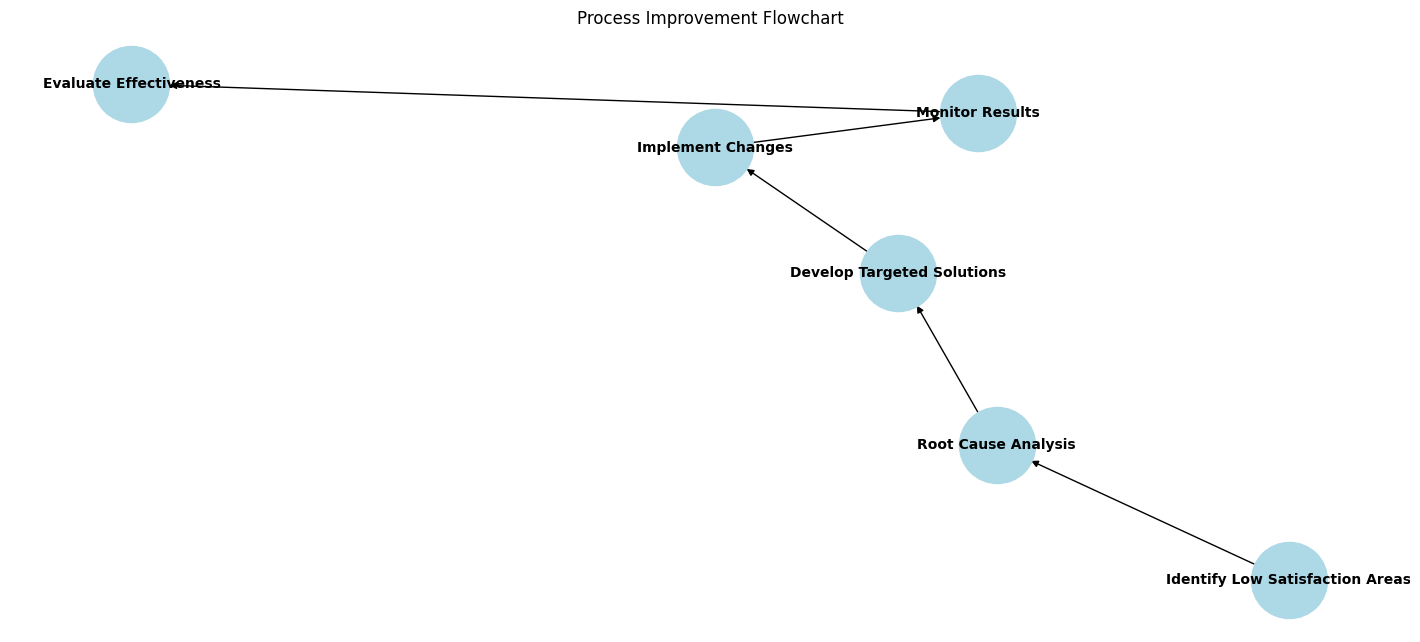

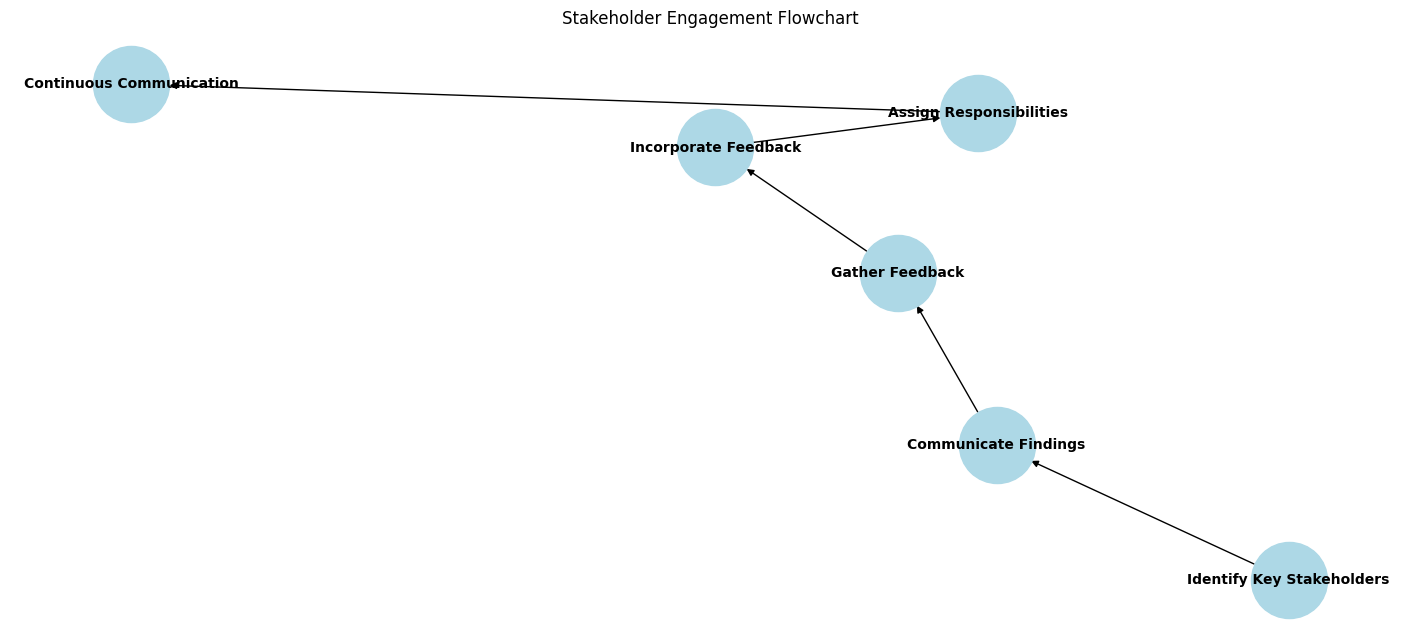

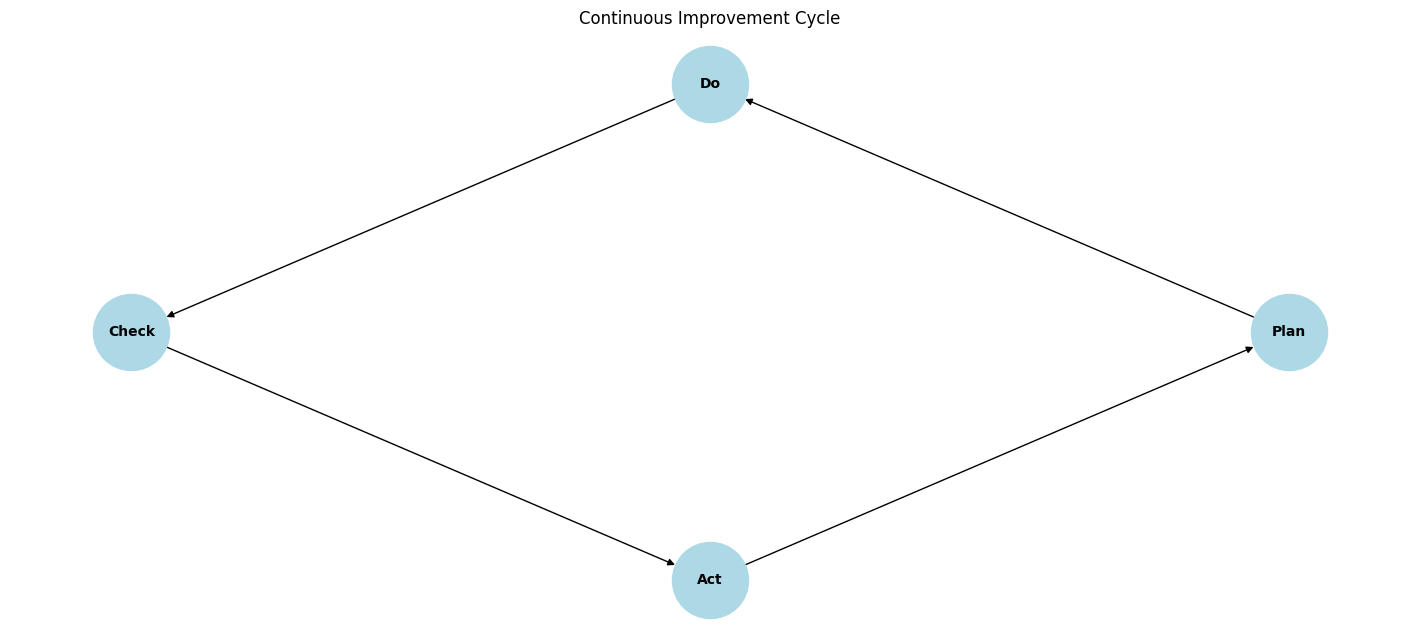

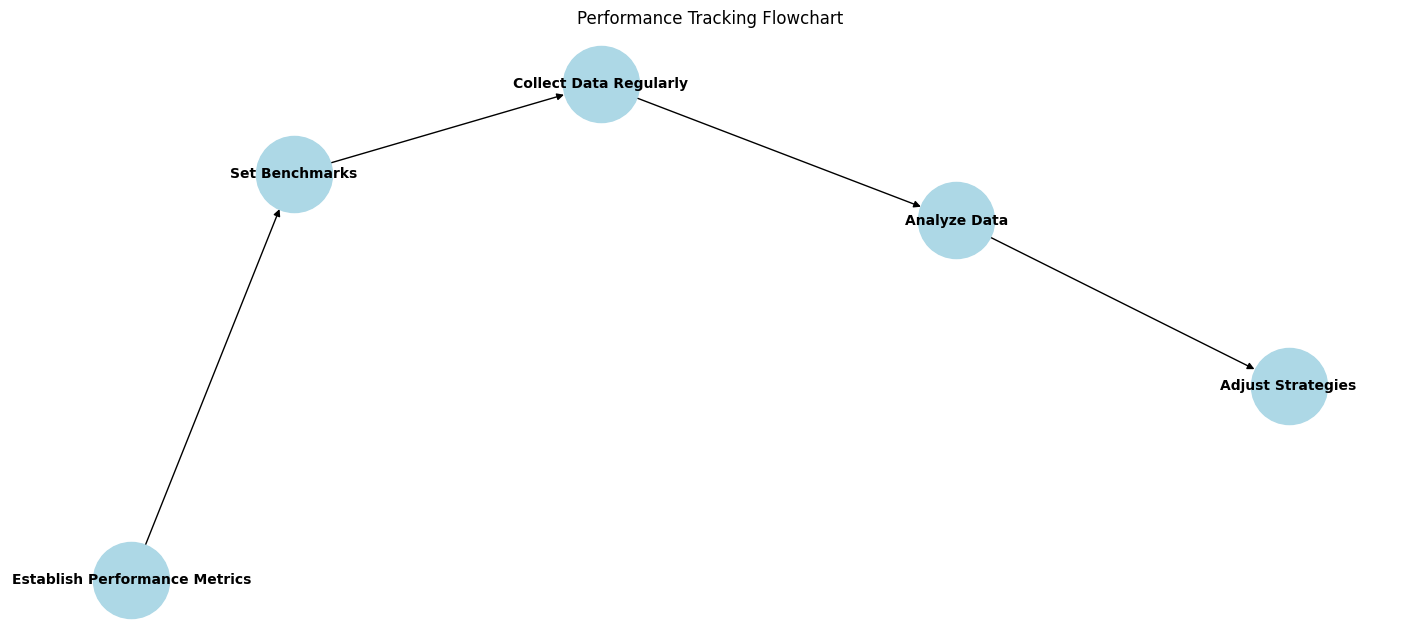

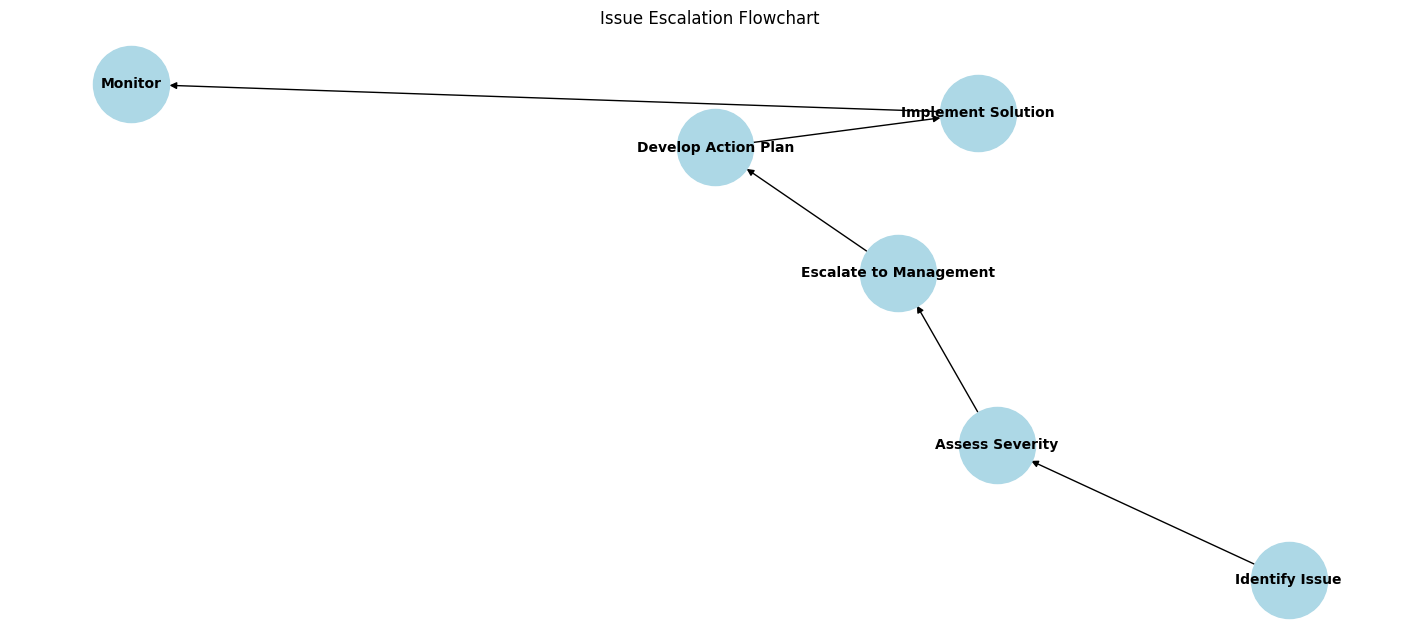

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# function to plot flowchart
def plot_flowchart(G, title, pos):
    plt.figure(figsize=(14, 6))
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=3000, font_size=10, font_color="black", font_weight="bold", arrows=True)
    plt.title(title)
    plt.show()

# 1. Process Improvement Flowchart
G1 = nx.DiGraph()
steps1 = [
    "Identify Low Satisfaction Areas", "Root Cause Analysis", "Develop Targeted Solutions",
    "Implement Changes", "Monitor Results", "Evaluate Effectiveness"
]
edges1 = [
    ("Identify Low Satisfaction Areas", "Root Cause Analysis"),
    ("Root Cause Analysis", "Develop Targeted Solutions"),
    ("Develop Targeted Solutions", "Implement Changes"),
    ("Implement Changes", "Monitor Results"),
    ("Monitor Results", "Evaluate Effectiveness")
]
G1.add_nodes_from(steps1)
G1.add_edges_from(edges1)
pos1 = nx.spring_layout(G1, seed=42)
plot_flowchart(G1, "Process Improvement Flowchart", pos1)

# 2. Stakeholder Engagement Flowchart
G2 = nx.DiGraph()
steps2 = [
    "Identify Key Stakeholders", "Communicate Findings", "Gather Feedback",
    "Incorporate Feedback", "Assign Responsibilities", "Continuous Communication"
]
edges2 = [
    ("Identify Key Stakeholders", "Communicate Findings"),
    ("Communicate Findings", "Gather Feedback"),
    ("Gather Feedback", "Incorporate Feedback"),
    ("Incorporate Feedback", "Assign Responsibilities"),
    ("Assign Responsibilities", "Continuous Communication")
]
G2.add_nodes_from(steps2)
G2.add_edges_from(edges2)
pos2 = nx.spring_layout(G2, seed=42)
plot_flowchart(G2, "Stakeholder Engagement Flowchart", pos2)

# 3. Continuous Improvement Cycle (PDCA) Flowchart
G3 = nx.DiGraph()
steps3 = ["Plan", "Do", "Check", "Act"]
edges3 = [("Plan", "Do"), ("Do", "Check"), ("Check", "Act"), ("Act", "Plan")]
G3.add_nodes_from(steps3)
G3.add_edges_from(edges3)
pos3 = nx.circular_layout(G3)
plot_flowchart(G3, "Continuous Improvement Cycle", pos3)

# 4. Performance Tracking Flowchart
G4 = nx.DiGraph()
steps4 = [
    "Establish Performance Metrics", "Set Benchmarks", "Collect Data Regularly",
    "Analyze Data", "Adjust Strategies"
]
edges4 = [
    ("Establish Performance Metrics", "Set Benchmarks"),
    ("Set Benchmarks", "Collect Data Regularly"),
    ("Collect Data Regularly", "Analyze Data"),
    ("Analyze Data", "Adjust Strategies")
]
G4.add_nodes_from(steps4)
G4.add_edges_from(edges4)
pos4 = nx.spring_layout(G4, seed=42)
plot_flowchart(G4, "Performance Tracking Flowchart", pos4)

# 5. Issue Escalation Flowchart
G5 = nx.DiGraph()
steps5 = [
    "Identify Issue", "Assess Severity", "Escalate to Management",
    "Develop Action Plan", "Implement Solution", "Monitor"
]
edges5 = [
    ("Identify Issue", "Assess Severity"),
    ("Assess Severity", "Escalate to Management"),
    ("Escalate to Management", "Develop Action Plan"),
    ("Develop Action Plan", "Implement Solution"),
    ("Implement Solution", "Monitor")
]
G5.add_nodes_from(steps5)
G5.add_edges_from(edges5)
pos5 = nx.spring_layout(G5, seed=42)
plot_flowchart(G5, "Issue Escalation Flowchart", pos5)

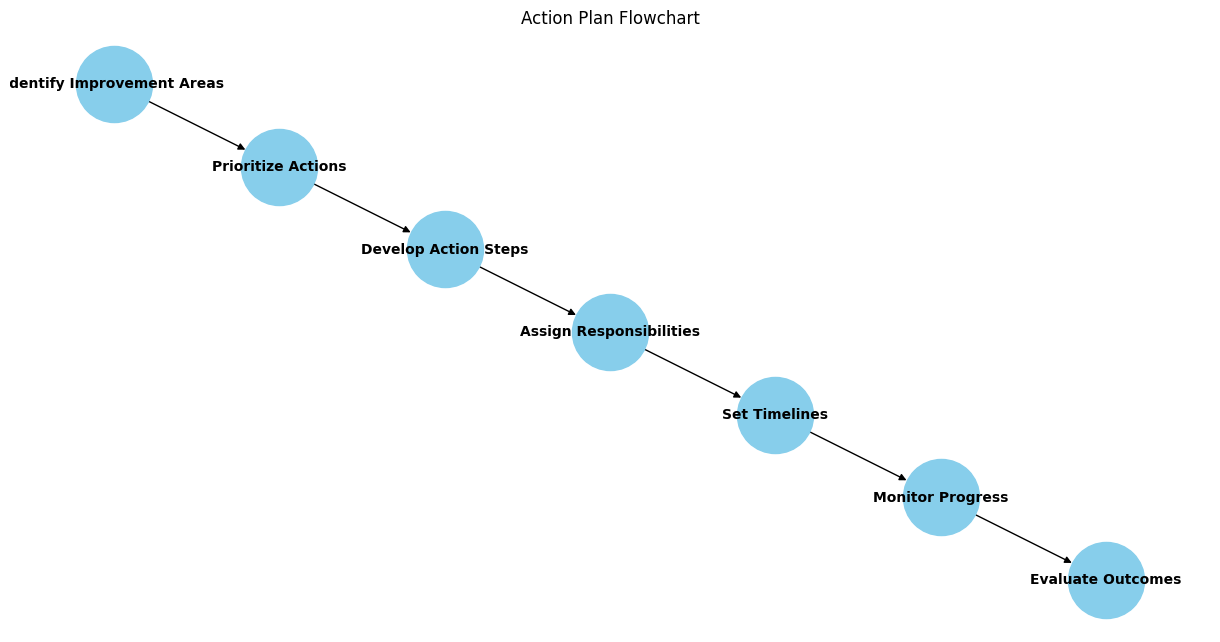

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize directed graph for the action plan
G = nx.DiGraph()

# Define the action plan steps as nodes
steps = [
    "Identify Improvement Areas",
    "Prioritize Actions",
    "Develop Action Steps",
    "Assign Responsibilities",
    "Set Timelines",
    "Monitor Progress",
    "Evaluate Outcomes"
]

# Add nodes for each step in the action plan
for step in steps:
    G.add_node(step)

# Define the sequence of steps as edges
edges = [
    ("Identify Improvement Areas", "Prioritize Actions"),
    ("Prioritize Actions", "Develop Action Steps"),
    ("Develop Action Steps", "Assign Responsibilities"),
    ("Assign Responsibilities", "Set Timelines"),
    ("Set Timelines", "Monitor Progress"),
    ("Monitor Progress", "Evaluate Outcomes")
]

# Add edges to the graph
G.add_edges_from(edges)

# Define positions for each node to make the flowchart linear
pos = {
    "Identify Improvement Areas": (0, 6),
    "Prioritize Actions": (1, 5),
    "Develop Action Steps": (2, 4),
    "Assign Responsibilities": (3, 3),
    "Set Timelines": (4, 2),
    "Monitor Progress": (5, 1),
    "Evaluate Outcomes": (6, 0)
}

# Draw the graph
plt.figure(figsize=(12, 6))
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=3000, font_size=10, font_color="black", font_weight="bold", arrows=True)
plt.title("Action Plan Flowchart")
plt.show()

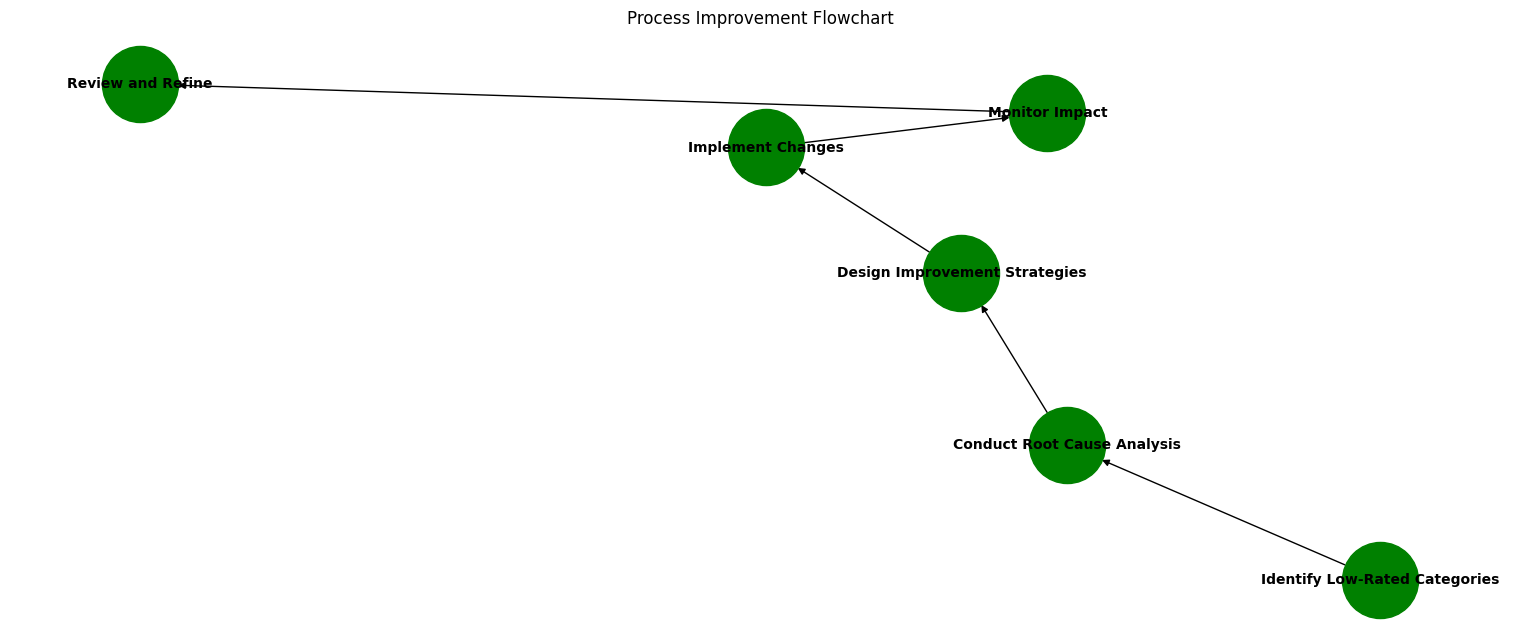

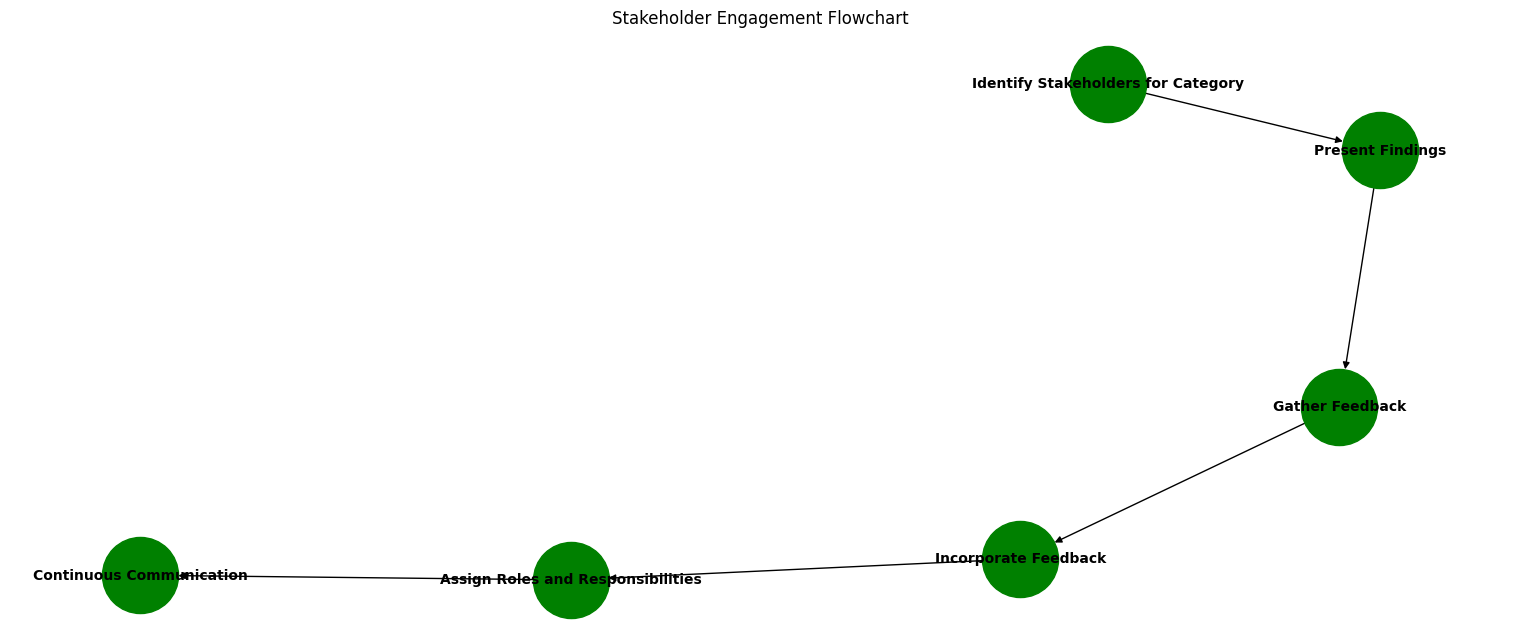

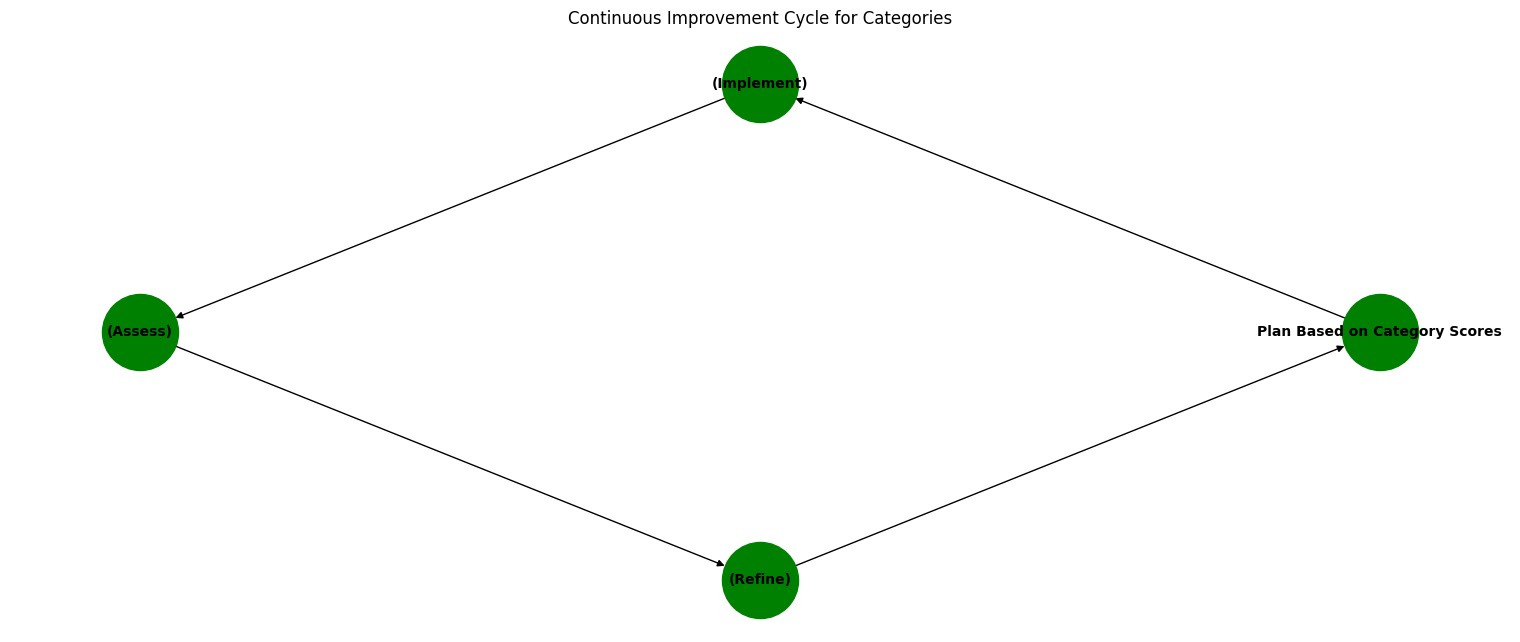

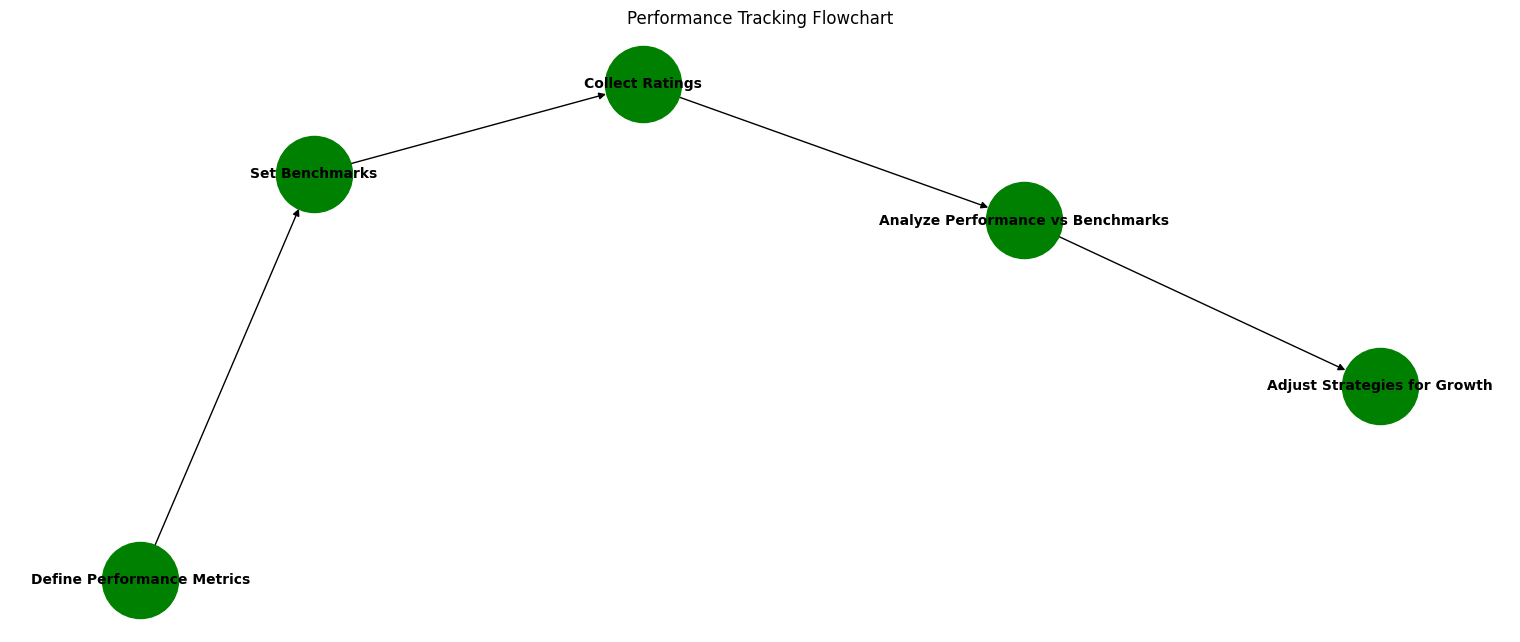

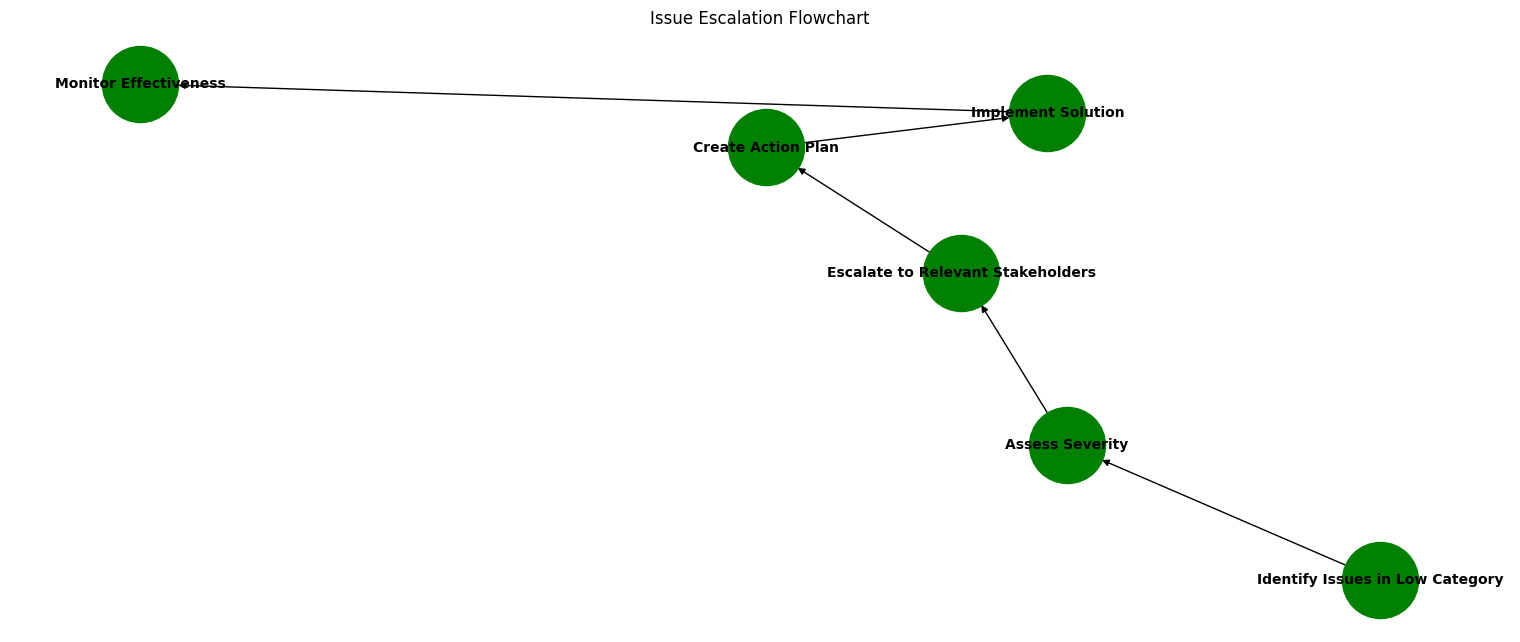

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

# Define a function to plot flowchart
def plot_flowchart(G, title, pos):
    plt.figure(figsize=(15, 6))
    nx.draw(G, pos, with_labels=True, node_color="green", node_size=3000, font_size=10, font_color="black", font_weight="bold", arrows=True)
    plt.title(title)
    plt.show()

# 1. Process Improvement Flowchart based on Identified Categories
G1 = nx.DiGraph()
steps1 = [
    "Identify Low-Rated Categories", "Conduct Root Cause Analysis", "Design Improvement Strategies",
    "Implement Changes", "Monitor Impact", "Review and Refine"
]
edges1 = [
    ("Identify Low-Rated Categories", "Conduct Root Cause Analysis"),
    ("Conduct Root Cause Analysis", "Design Improvement Strategies"),
    ("Design Improvement Strategies", "Implement Changes"),
    ("Implement Changes", "Monitor Impact"),
    ("Monitor Impact", "Review and Refine")
]
G1.add_nodes_from(steps1)
G1.add_edges_from(edges1)
pos1 = nx.spring_layout(G1, seed=42)
plot_flowchart(G1, "Process Improvement Flowchart", pos1)

# 2. Stakeholder Engagement Flowchart
G2 = nx.DiGraph()
steps2 = [
    "Identify Stakeholders for Category", "Present Findings", "Gather Feedback",
    "Incorporate Feedback", "Assign Roles and Responsibilities", "Continuous Communication"
]
edges2 = [
    ("Identify Stakeholders for Category", "Present Findings"),
    ("Present Findings", "Gather Feedback"),
    ("Gather Feedback", "Incorporate Feedback"),
    ("Incorporate Feedback", "Assign Roles and Responsibilities"),
    ("Assign Roles and Responsibilities", "Continuous Communication")
]
G2.add_nodes_from(steps2)
G2.add_edges_from(edges2)
pos2 = nx.spring_layout(G2, seed=41)
plot_flowchart(G2, "Stakeholder Engagement Flowchart", pos2)

# 3. Continuous Improvement Cycle (PDCA) Flowchart
G3 = nx.DiGraph()
steps3 = ["Plan Based on Category Scores", "(Implement)", "(Assess)", "(Refine)"]
edges3 = [
    ("Plan Based on Category Scores", "(Implement)"), ("(Implement)", "(Assess)"), ("(Assess)", "(Refine)"), ("(Refine)", "Plan Based on Category Scores")
    ]
G3.add_nodes_from(steps3)
G3.add_edges_from(edges3)
pos3 = nx.circular_layout(G3)
plot_flowchart(G3, "Continuous Improvement Cycle for Categories", pos3)

# 4. Performance Tracking Flowchart
G4 = nx.DiGraph()
steps4 = [
    "Define Performance Metrics", "Set Benchmarks", "Collect Ratings", 
    "Analyze Performance vs Benchmarks", "Adjust Strategies for Growth"
]
edges4 = [
    ("Define Performance Metrics", "Set Benchmarks"),
    ("Set Benchmarks", "Collect Ratings"),
    ("Collect Ratings", "Analyze Performance vs Benchmarks"),
    ("Analyze Performance vs Benchmarks", "Adjust Strategies for Growth")
]
G4.add_nodes_from(steps4)
G4.add_edges_from(edges4)
pos4 = nx.spring_layout(G4, seed=42)
plot_flowchart(G4, "Performance Tracking Flowchart", pos4)

# 5. Issue Escalation Flowchart
G5 = nx.DiGraph()
steps5 = [
    "Identify Issues in Low Category", "Assess Severity", "Escalate to Relevant Stakeholders",
    "Create Action Plan", "Implement Solution", "Monitor Effectiveness"
]
edges5 = [
    ("Identify Issues in Low Category", "Assess Severity"),
    ("Assess Severity", "Escalate to Relevant Stakeholders"),
    ("Escalate to Relevant Stakeholders", "Create Action Plan"),
    ("Create Action Plan", "Implement Solution"),
    ("Implement Solution", "Monitor Effectiveness")
]
G5.add_nodes_from(steps5)
G5.add_edges_from(edges5)
pos5 = nx.spring_layout(G5, seed=42)
plot_flowchart(G5, "Issue Escalation Flowchart", pos5)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f021e8f8-71e0-42cd-8c7c-b202e6d52729' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>